In [1]:
import numpy as np

In [2]:
from optim import *
from util import *

### Measuring CPU time

##### Experiment 1 ($n=4000$, $m=1000$, $\rho=0.1$, $seed=42$)

In [3]:
# Example usage
m, n, rho = 1000, 4000, 1
A, b, x_star = generate_sparse_least_squares(m, n, rho, random_seed=42)

In [4]:
# primal
x0 = np.zeros(n)
tol = 1e-9 # tolerance for relative gap reduction
solver = PrimalGradientMethod(A, b, x0, tol, max_iter=10000)
solution, iterations, final_gap, gap_history, loss_history, cpu_time = solver.compute_steps()

In [5]:
solution

array([ 0.49963609,  0.28391818, -0.25457929, ...,  0.7075572 ,
        0.81571991,  0.22095748])

In [6]:
# dual
v0 = np.zeros(n)
L0 = 2
gamma_d = 2
penalty = 0.0  # This replaces lambda_ as a regularization parameter

solver = DualGradientMethod(A, b, penalty, gamma_d=2, gamma_u=1.0, L_0=L0, v_0=v0, max_iter=10000, tol=tol)
solution_dual, iterations_dual, final_gap_dual, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()

In [7]:
solution_dual

array([ 0.49953629,  0.28384051, -0.25464101, ...,  0.70754036,
        0.81577746,  0.22087758])

In [8]:
# nesterov
v0 = np.zeros(n)  # Initial point
L0 = 1.0          # Initial Lipschitz constant guess
solver = NesterovAcceleratedGradientMethod(A, b, L0, v0, max_iter=10000, tol=1e-9)
solution_nag, iterations_nag, final_gap_nag, gap_history_nag, loss_history_nag, cpu_time_nag = solver.compute_steps()

In [9]:
solution_nag

array([ 0.49957994,  0.28385573, -0.25465725, ...,  0.70751566,
        0.81577232,  0.22096123])

In [10]:
print(iterations, iterations_dual, iterations_nag)

28 350 46


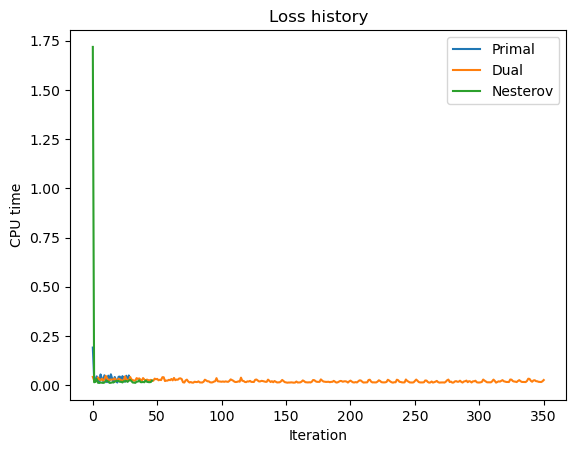

In [11]:
# plot the loss history
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.plot(cpu_time, label='Primal')
plt.plot(cpu_history_dual, label='Dual')
plt.plot(cpu_time_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('CPU time')
plt.legend()
plt.show()

### Diabetes dataset check

In [30]:
X_train, X_test, y_train, y_test = load_diabetes_data()

In [31]:
# primal
x0 = np.zeros(X_train.shape[1])
tol = 1e-9 # tolerance for relative gap reduction
solver = PrimalGradientMethod(X_train, y_train, x0, tol, max_iter=10000)
solution, iterations, final_gap, gap_history, loss_history, cpu_time = solver.compute_steps()

In [32]:
solution

array([ 114.89644702, -219.57385519,  583.26023856,  342.29142375,
       -121.36441297, -186.47846948, -244.44053673,  126.4717743 ,
        408.91505311,  192.71308482])

In [35]:
# dual
v0 = np.zeros(X_train.shape[1])
L0 = 2
gamma_d = 2
penalty = 0.0  # This replaces lambda_ as a regularization parameter

solver = DualGradientMethod(X_train, y_train, penalty, gamma_d=2, gamma_u=1.0, L_0=L0, v_0=v0, max_iter=10000, tol=tol)
solution_dual, iterations_dual, final_gap_dual, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()

In [36]:
solution_dual

array([ 125.20585603, -258.20009863,  627.47883518,  346.31261166,
       -803.69633456,  313.18488346,   45.28479605,  212.04054686,
        701.01740074,  144.68989432])

In [33]:
# nesterov
v0 = np.zeros(X_train.shape[1])  # Initial point
L0 = 1.0          # Initial Lipschitz constant guess
A = X_train
b = y_train
solver = NesterovAcceleratedGradientMethod(A, b, L0, v0, max_iter=1000, tol=1e-9)
solution_nag, iterations_nag, final_gap_nag, gap_history_nag, loss_history_nag, cpu_time_nag = solver.compute_steps()

In [34]:
solution_nag

array([ 125.20673175, -258.20235343,  627.47490816,  346.31699151,
       -803.98535714,  313.41534649,   45.40868477,  212.07666587,
        701.12573786,  144.68261964])

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[   0.          -81.08679585  546.89838663  264.96936272   -0.
   -0.         -197.78452106    0.          396.22641741    0.        ]


### Nesterov Comparison with `LASSORegressionCV` and `LARS`